In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [211]:
# Creating a simple feedforward neuran network
class FNN(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        
        self.f1 = torch.nn.Linear(2,3)
        #self.actfun1 = torch.nn.Sigmoid()
        self.actfun1 = torch.nn.ReLU()
        
        self.f2 = torch.nn.Linear(3,2)
        #self.actfun2 = torch.nn.Sigmoid()
        self.actfun2 = torch.nn.ReLU()
        
        self.soft = torch.nn.Softmax(1)
        
    def forward(self,x):
        o = self.f1(x)
        o = self.actfun1(o)
        o = self.f2(o)
        #o = self.actfun2(o)
        o = self.soft(o)
        return o
    
    def train(self,train_dl,epochs=20):
        opt = torch.optim.SGD(self.parameters(),lr=1)
        #crit = torch.nn.MSELoss()
        crit = torch.nn.CrossEntropyLoss()
        tot_loss = []
        for epoch in range(epochs):
            s = 0
            for i,(x,y) in enumerate(train_dl):
                opt.zero_grad()
                o = self.forward(x)
                loss = crit(o,y)
                s = s + loss
                loss.backward()
                opt.step()
            tot_loss.append(s)
        return tot_loss
                
            

In [103]:
x_train = torch.Tensor([[0,0],[0,1],[1,0],[1,1]]).float()
y_train = torch.Tensor([0,1,1,0]).long()
#y_train = torch.Tensor([[1,0],[0,1],[0,1],[1,0]]).float()

In [104]:
ds = torch.utils.data.TensorDataset(x_train,y_train)
dl = torch.utils.data.DataLoader(ds,batch_size=4)

In [212]:
model = FNN()
model.forward(x_train)

tensor([[0.6684, 0.3316],
        [0.7070, 0.2930],
        [0.6846, 0.3154],
        [0.6843, 0.3157]], grad_fn=<SoftmaxBackward>)

In [213]:
loss = model.train(dl,epochs=100)

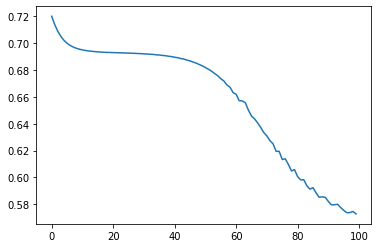

In [216]:
plt.plot(loss)
plt.show()

In [217]:
model.forward(x_train)

tensor([[0.9246, 0.0754],
        [0.2848, 0.7152],
        [0.2898, 0.7102],
        [0.2919, 0.7081]], grad_fn=<SoftmaxBackward>)